In [23]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime
import seaborn as sns


In this section we read the CSV file located in the "Resources" folder and then display the DataFrame accordingly

In [24]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Resources/clean_data.csv')

# Display the first few rows of the DataFrame
df.head()


,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,Transaction Date,Time,Age
0,0,2291160000000000,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,21/06/2020,12:14,56
1,1,3573030000000000,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,21/06/2020,12:14,34
2,2,3598220000000000,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,21/06/2020,12:14,54
3,3,3591920000000000,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,21/06/2020,12:15,37
4,4,3526830000000000,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,21/06/2020,12:15,69


This code below performs the following tasks:
Filtering Fraud Transactions: It filters the DataFrame (df) to select only the rows corresponding to fraudulent transactions. This is achieved by using boolean indexing with the condition df['is_fraud'] == 1. The filtered DataFrame is assigned to the variable fraudulent_transactions.

Calculating Average Age of Fraud Victims: Then it calculates the average age of the fraud victims using the mean() function applied to the 'Age' column of the fraudulent_transactions DataFrame. The result is rounded to two decimal places and stored in the variable average_age_fraudulent.

Plotting Histogram of Age Distribution: Then it creates a histogram of the age distribution of credit card fraud victims using Matplotlib. It specifies the number of bins as 20 in order to capture a reasonable range of ages present in the data in order to provide a detailed visualization of the age distribution of credit card fraud victims. Then it sets the color of the bars to 'skyblue', adds black edges to the bars, sets the title and axis labels, removes the gridlines, and displays the plot.


Average age of credit card fraud victims: 52.74


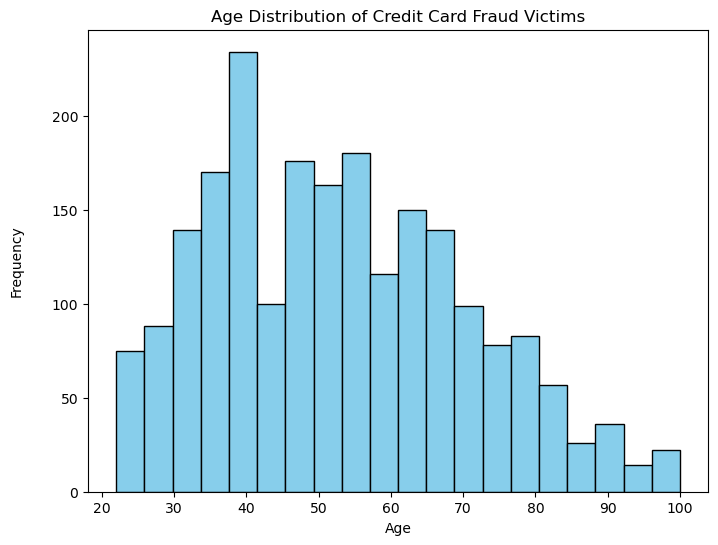

In [25]:
# Filter fraud transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Calculate the average age of fraud victims
average_age_fraudulent = round(fraudulent_transactions['Age'].mean(), 2)
print("Average age of credit card fraud victims:", average_age_fraudulent)

plt.figure(figsize=(8, 6))
plt.hist(fraudulent_transactions['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Credit Card Fraud Victims')
plt.xlabel('Age')
plt.ylabel('Frequency', labelpad=20)
plt.grid(False)
plt.show()



This code below performs the following tasks:
Defining Age Categories: It defines age categories by specifying bins (ranges of ages) and corresponding labels. This is done using the pd.cut() function, which segments the 'Age' column of the DataFrame (df) into the specified bins and assigns labels to each segment. 

Filtering Fraudulent Transactions: Then it filters the DataFrame (df) to select only the rows corresponding to fraudulent transactions. This is achieved by using boolean indexing with the condition df['is_fraud'] == 1, which selects rows where the 'is_fraud' column has a value of 1, indicating a fraudulent transaction.

Counting Fraudulent Transactions per Age Category: Then it counts the number of fraudulent transactions in each age category by applying the value_counts() function to the 'age_category' column of the fraudulent_transactions DataFrame, which counts the occurrences of each unique value (i.e., age category) and sorts them in ascending order based on the index.

Visualizing the Results: Then it visualizes the number of fraudulent transactions per age category using a bar plot with the 'age_category' values on the x-axis and the counts on the y-axis. The plot is customized with a title, axis labels, rotated x-axis labels for better readability, and gridlines.

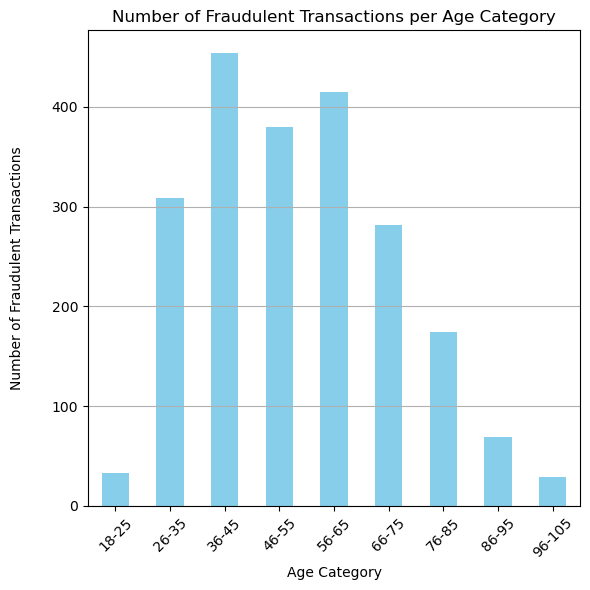

In [26]:
# Define age categories
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96-105']
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Count fraudulent transactions per age category
fraud_per_age_category = fraudulent_transactions['age_category'].value_counts().sort_index()

# Visualize the results
fig, ax = plt.subplots(figsize=(6, 6))

# Plot fraudulent transactions per age category
fraud_per_age_category.plot(kind='bar', color='skyblue')
plt.title('Number of Fraudulent Transactions per Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Fraudulent Transactions', labelpad=20)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


This code below performs the following tasks:
Counting Transactions per Age Category: It counts the total number of transactions in each age category. This is done by applying the value_counts() function to the 'age_category' column of the DataFrame (df), which counts the occurrences of each unique value (i.e., age category) and sorts them in ascending order based on the index.

Filtering Fraudulent Transactions: Then it filters the DataFrame (df) to select only the rows corresponding to fraudulent transactions. This is achieved by using boolean indexing with the condition df['is_fraud'] == 1, which selects rows where the 'is_fraud' column has a value of 1, indicating a fraudulent transaction. 

Counting Fraudulent Transactions per Age Category: Then it counts the number of fraudulent transactions in each age category. This is done by applying the value_counts() function to the 'age_category' column of the fraudulent_transactions DataFrame, which counts the occurrences of each unique value (i.e., age category) and sorts them in ascending order based on the index.

Calculating Fraudulent Transaction Rate per Age Category: Then it calculates the rate of fraudulent transactions per age category by dividing the number of fraudulent transactions in each age category by the total number of transactions in that age category, and then multiplying by 100 to express it as a percentage.

Visualizing the Results: Then it visualizes the rate of fraudulent transactions per age category using a bar plot. The plot() function creates the bar plot, with the 'age_category' values on the x-axis and the fraudulent transaction rates on the y-axis. The plot is customized with a title, axis labels, rotated x-axis labels for better readability, and gridlines.

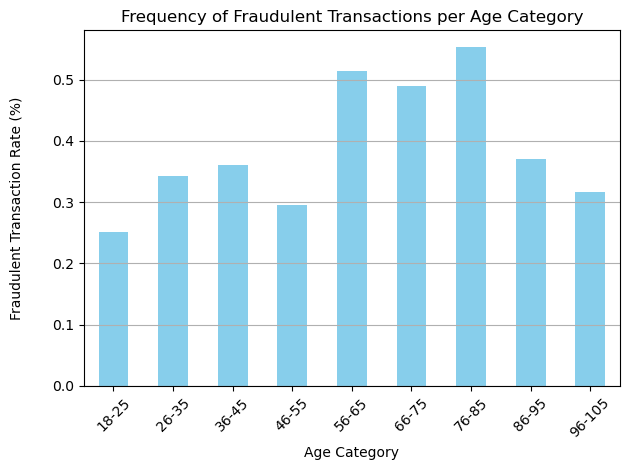

In [27]:
# Leveraging the previously created age categories, bins, labels, and DataFrame df
# Count transactions per age category
transactions_per_age_category = df['age_category'].value_counts().sort_index()

# Filter fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Count fraudulent transactions per age category
fraud_per_age_category = fraudulent_transactions['age_category'].value_counts().sort_index()

# Calculate the rate of fraudulent transactions per age category
fraud_rate_per_age_category = (fraud_per_age_category / transactions_per_age_category) * 100

# Visualize the results
fraud_rate_per_age_category.plot(kind='bar', color='skyblue')
plt.title('Frequency of Fraudulent Transactions per Age Category')
plt.xlabel('Age Category')
plt.ylabel('Fraudulent Transaction Rate (%)', labelpad=20)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This code below performs the following tasks:
Importing Libraries: It imports the chi2_contingency function from the scipy.stats module. This function is used to perform the chi-square test for independence.

Creating Contingency Table: Then it creates a contingency table of age categories and fraudulent transactions using the pd.crosstab() function. This function counts the occurrences of each combination of values between the 'age_category' and 'is_fraud' columns and arranges them in a tabular format.

Performing Chi-square Test for Independence: Then it performs the chi-square test for independence using the chi2_contingency() function. This test evaluates whether there is a significant association between two categorical variables (in this case, age category and fraudulent transactions) in a contingency table.

Printing Results: Then it prints the results of the chi-square test, including the chi-square statistic and the p-value. The chi-square statistic quantifies the degree of association between the variables, while the p-value indicates the probability of observing the observed association (or a more extreme one) under the null hypothesis of independence.

In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table of age categories and fraudulent transactions
contingency_table = pd.crosstab(df['age_category'], df['is_fraud'])

# Perform chi-square test for independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 115.09589699397517
P-value: 3.404172531724408e-21
